In [1]:
from IPython import display
!pip install ultralytics

display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.71 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
try:
    rm -r /content/datasets
except:
    pass

In [4]:
directory = f'{HOME}/datasets'
if not os.path.exists(directory):
    os.makedirs(directory)
    print('Directory created successfully')
else:
    print('Directory already exists')

Directory created successfully


In [5]:
cd {HOME}/datasets

/kaggle/working/datasets


In [6]:
import cv2
import shutil

if os.path.exists('TennisCourtZone'):
    shutil.rmtree('TennisCourtZone')
    print(f"Removed existing directory")

!git clone https://github.com/iramamy/TennisCourtZone.git
print('Repository cloned')

Cloning into 'TennisCourtZone'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (355/355), done.
remote: Total 361 (delta 5), reused 361 (delta 5), pack-reused 0
Receiving objects: 100% (361/361), 18.76 MiB | 36.24 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Repository cloned


In [7]:
from ultralytics import YOLO, solutions
from IPython.display import display, Image

requirements: Ultralytics requirement ['shapely>=2.0.0'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.5 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1

requirements: AutoUpdate success ✅ 13.0s, installed 1 package: ['shapely>=2.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



In [8]:
model = YOLO("yolov8x-seg.pt")

100%|██████████| 137M/137M [00:00<00:00, 169MB/s]  


In [9]:
model.train(
    data=f"{HOME}/datasets/TennisCourtZone/data.yaml", 
    epochs=20,
    imgsz=640)

Ultralytics YOLOv8.2.71 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/kaggle/working/datasets/TennisCourtZone/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 13.7MB/s]
2024-08-02 10:19:06,253	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-02 10:19:07,743	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 64.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/TennisCourtZone/Train/labels... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<00:00, 787.89it/s]

train: New cache created: /kaggle/working/datasets/TennisCourtZone/Train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/TennisCourtZone/Valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 570.27it/s]

val: New cache created: /kaggle/working/datasets/TennisCourtZone/Valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20       3.5G      1.202      4.227      2.962      1.573         11        640: 100%|██████████| 14/14 [00:26<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         60        474      0.721      0.975      0.879      0.739      0.562       0.76      0.648      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.64G     0.3957      1.144     0.9161     0.9223         26        640: 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         60        474      0.558      0.963      0.703      0.656      0.427      0.764      0.467      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.9G     0.3794     0.9709     0.7713     0.9094         23        640: 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all         60        474      0.627      0.878      0.826      0.774      0.532      0.745      0.686      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.9G     0.3752     0.8013     0.6459     0.9207         13        640: 100%|██████████| 14/14 [00:21<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         60        474      0.834      0.989      0.986      0.931      0.705      0.858      0.853      0.751



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      15.1G     0.3701     0.7169     0.5806     0.9104         15        640: 100%|██████████| 14/14 [00:21<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         60        474      0.882      0.934      0.981      0.917      0.769      0.806       0.85      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      15.1G     0.3999     0.6959     0.5368      0.918         12        640: 100%|██████████| 14/14 [00:21<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         60        474      0.812      0.766       0.91       0.81      0.642      0.685      0.719      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      14.8G     0.4009     0.8849     0.5572     0.9307         13        640: 100%|██████████| 14/14 [00:21<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         60        474      0.916       0.99      0.988      0.865      0.838      0.868      0.861      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      15.4G     0.3996     0.6249     0.5309     0.9102          8        640: 100%|██████████| 14/14 [00:21<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all         60        474      0.869      0.867      0.954      0.858      0.736      0.693      0.761      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.9G     0.3724     0.5845     0.4692     0.9067          8        640: 100%|██████████| 14/14 [00:21<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all         60        474      0.861      0.948      0.985      0.932      0.728       0.86      0.859      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.99G     0.3367      0.681     0.4161     0.8922          8        640: 100%|██████████| 14/14 [00:21<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         60        474      0.828      0.986      0.973      0.942      0.751      0.859      0.846      0.788


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      15.4G     0.4264     0.5094     0.4397     0.9578          8        640: 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         60        474      0.982      0.913      0.946        0.9      0.855      0.786      0.819      0.761



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      15.5G     0.3159      0.326     0.3352     0.9127          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         60        474      0.922      0.955      0.987      0.961      0.795      0.828      0.861      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      14.5G     0.2831     0.2867     0.2955      0.888          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         60        474      0.976      0.999      0.987      0.963       0.85      0.872       0.86      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      15.5G     0.2766     0.2659     0.2793     0.8652          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         60        474      0.983      0.998      0.989      0.972      0.857      0.871      0.863      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      14.9G     0.2554      0.266     0.2727     0.8564          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         60        474      0.982          1      0.989      0.978      0.855      0.873      0.862      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      15.5G     0.2386     0.2494     0.2592     0.8518          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         60        474      0.986          1       0.99      0.977      0.863      0.877      0.863      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      14.3G     0.2253     0.2273     0.2314     0.8307          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         60        474      0.986          1      0.992      0.989      0.859      0.873      0.866      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.99G     0.2143      0.193     0.2277     0.8167          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         60        474      0.986          1       0.99       0.98      0.932      0.946      0.918      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      14.5G     0.2038     0.2013     0.2231     0.8237          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         60        474      0.986          1       0.99      0.988      0.872      0.885      0.868       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.25G     0.1927     0.2289      0.198     0.8197          8        640: 100%|██████████| 14/14 [00:19<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         60        474      0.986          1       0.99      0.988      0.861      0.875      0.865      0.816



20 epochs completed in 0.150 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 144.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 144.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.71 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,728,360 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]


                   all         60        474      0.986          1       0.99       0.98      0.932      0.946      0.918      0.845
      bottom-dead-zone         59         59      0.982          1      0.979      0.978      0.982          1      0.979      0.979
                 court         60         60      0.998          1      0.995      0.995      0.582      0.583      0.436      0.165
    left-doubles-alley         59         59      0.982          1      0.993      0.989      0.982          1      0.993      0.988
      left-service-box         59         59      0.982          1      0.993      0.993      0.982          1      0.993      0.993
                   net         60         60      0.999          1      0.995      0.918      0.983      0.983      0.979       0.77
   right-doubles-alley         59         59      0.982          1      0.987      0.987      0.982          1      0.987      0.981
     right-service-box         59         59      0.982          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb8bf099d80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

In [10]:
!ls {HOME}/datasets/runs/segment/train/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


BoxF1_curve.png					  results.csv
BoxPR_curve.png					  results.png
BoxP_curve.png					  train_batch0.jpg
BoxR_curve.png					  train_batch1.jpg
MaskF1_curve.png				  train_batch140.jpg
MaskPR_curve.png				  train_batch141.jpg
MaskP_curve.png					  train_batch142.jpg
MaskR_curve.png					  train_batch2.jpg
args.yaml					  val_batch0_labels.jpg
confusion_matrix.png				  val_batch0_pred.jpg
confusion_matrix_normalized.png			  val_batch1_labels.jpg
events.out.tfevents.1722593967.39c3171f88e6.34.0  val_batch1_pred.jpg
labels.jpg					  weights
labels_correlogram.jpg


/kaggle/working


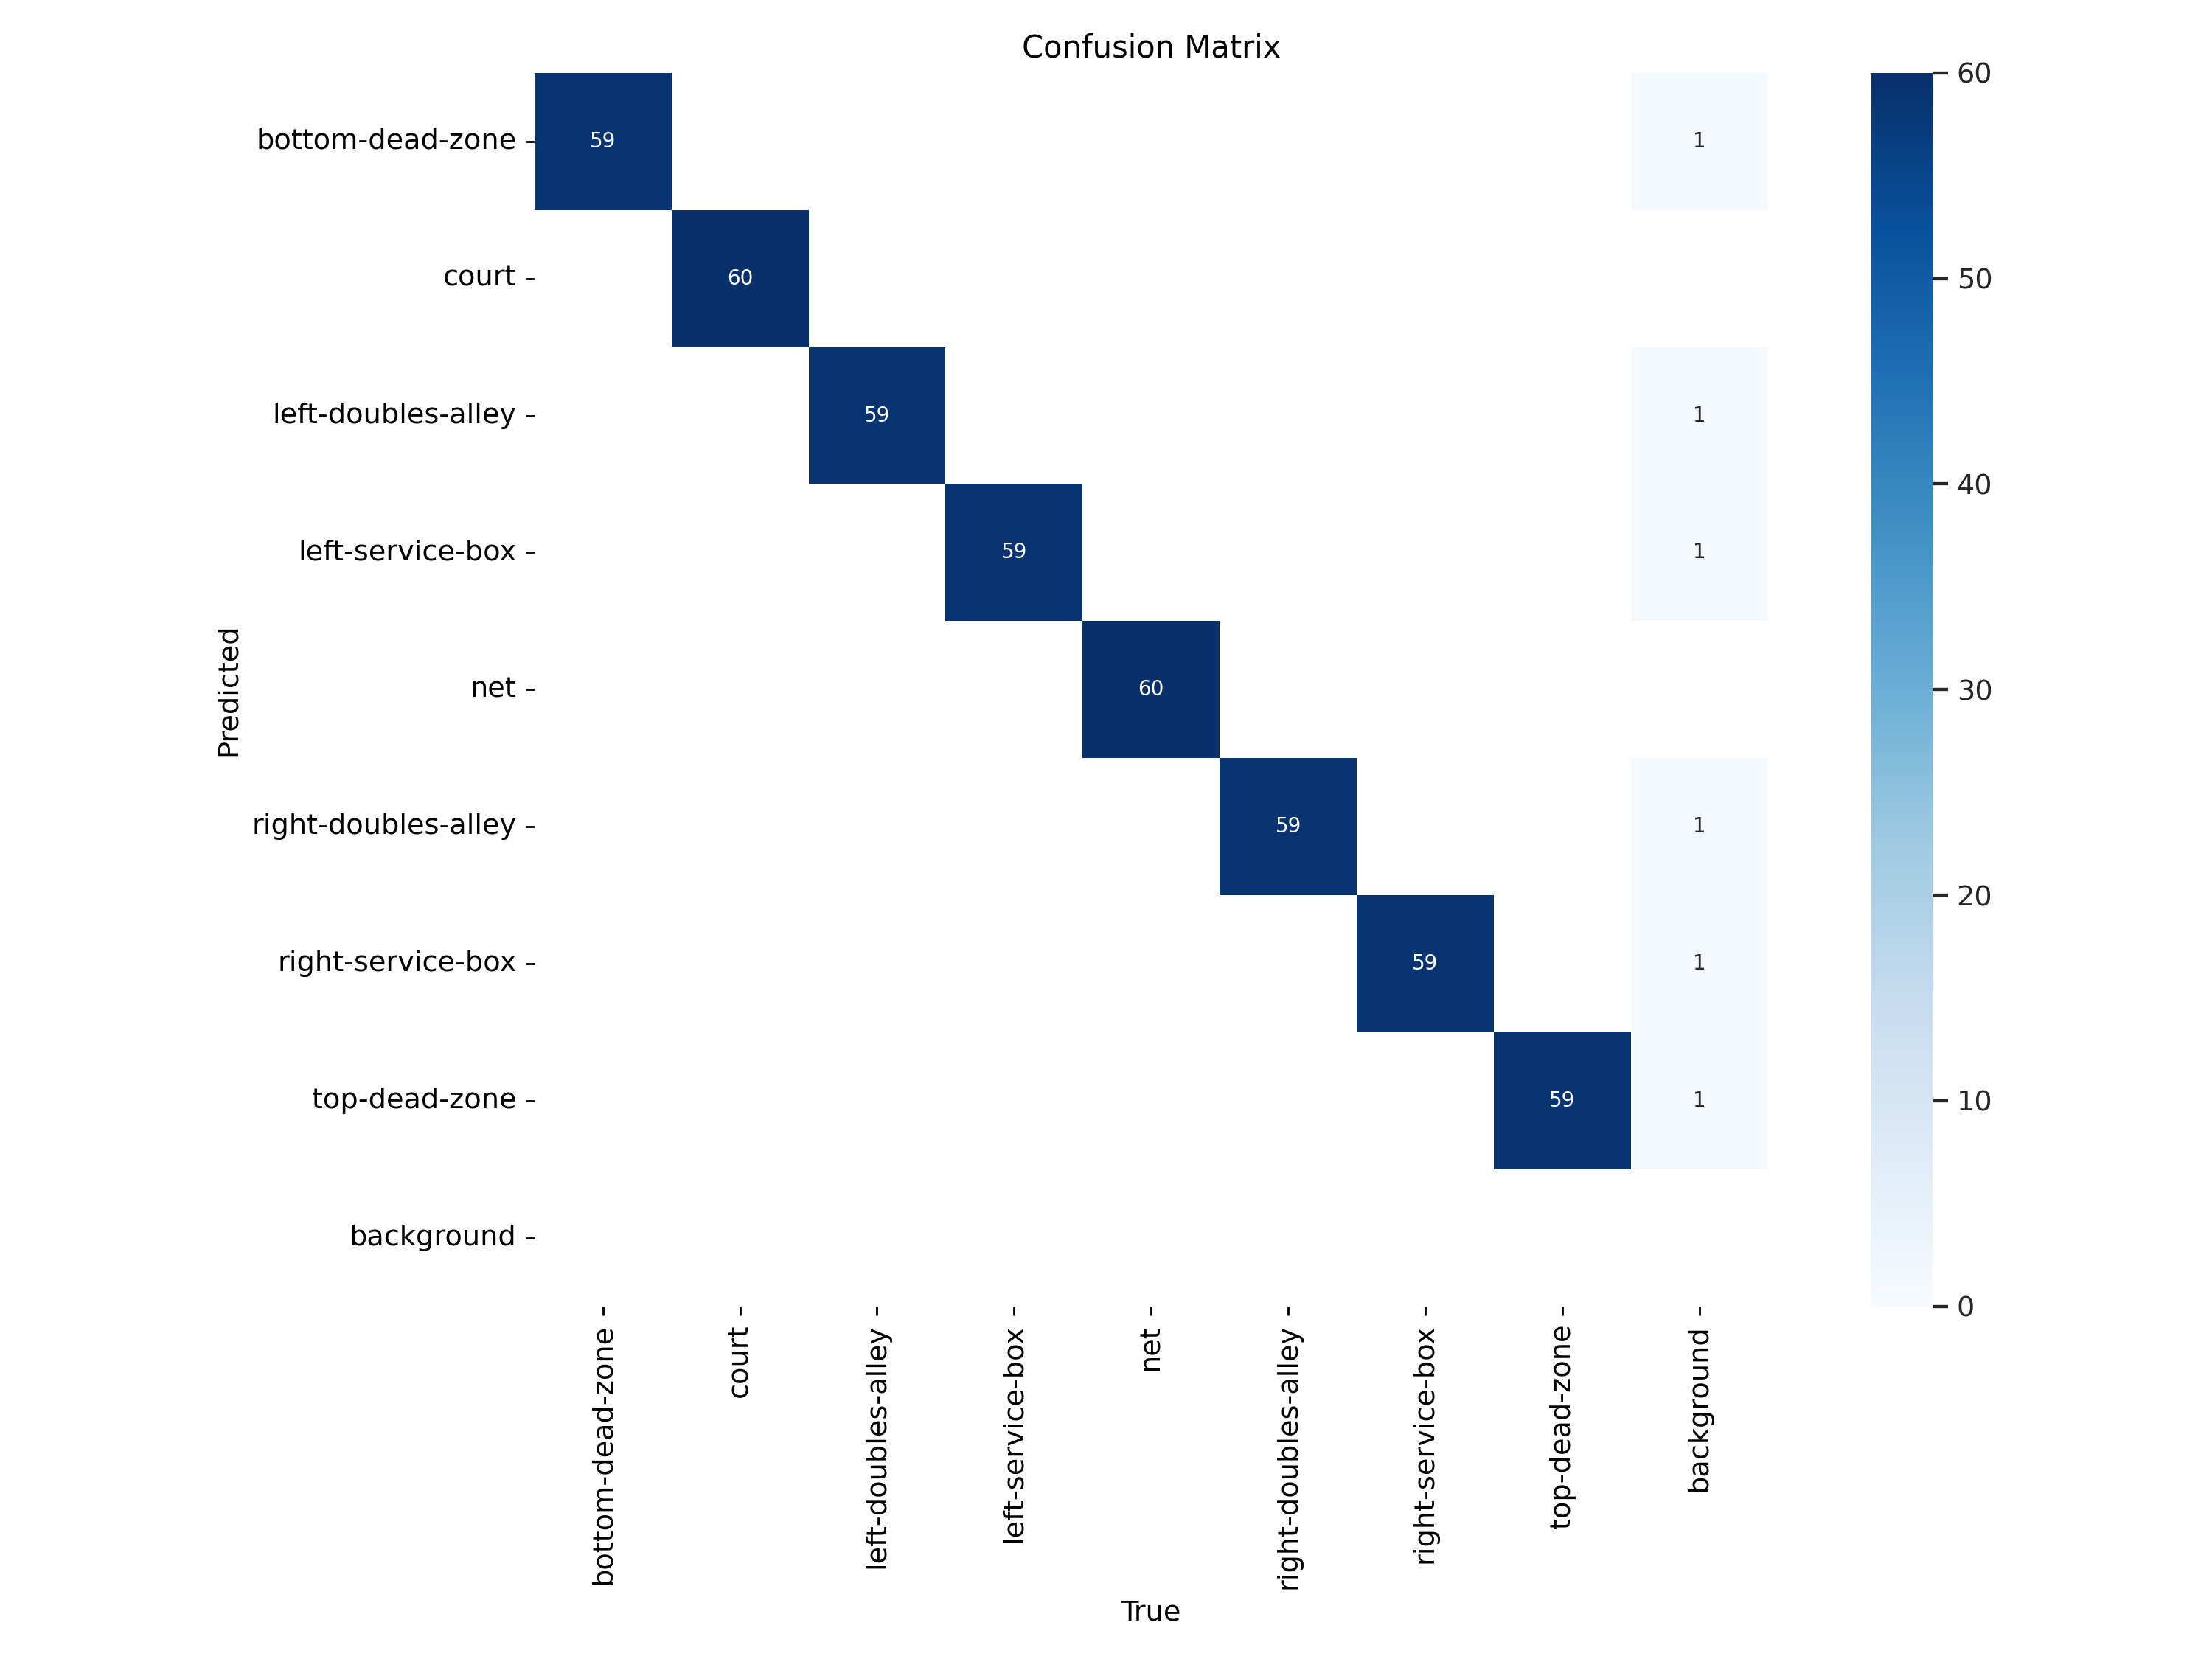

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/segment/train/confusion_matrix.png', width=600)

/kaggle/working


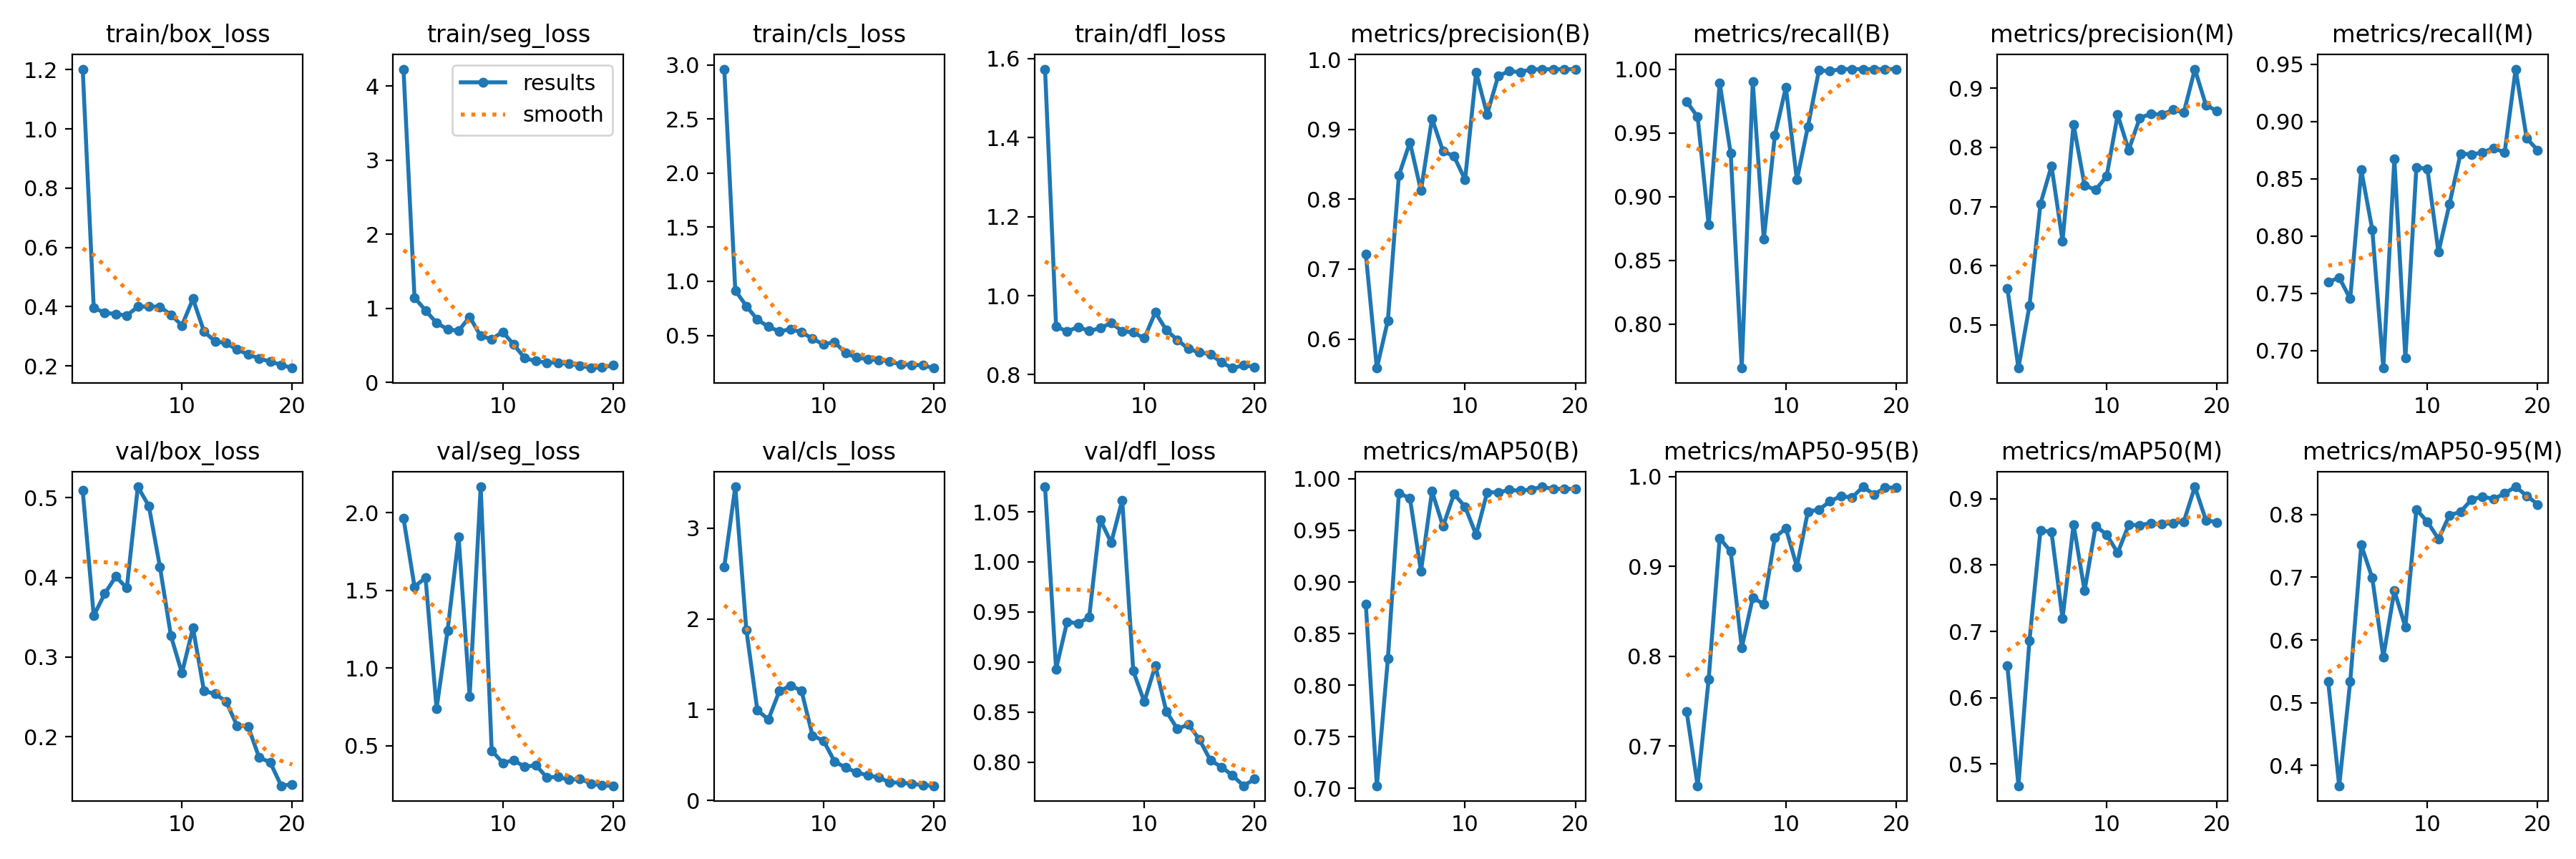

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/segment/train/results.png', width=1600)

In [13]:
%cd {HOME}

val_model = YOLO(f"{HOME}/datasets/runs/segment/train/weights/best.pt")
val_model.val(data=f"{HOME}/datasets/TennisCourtZone/data.yaml")

/kaggle/working
Ultralytics YOLOv8.2.71 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,728,360 parameters, 0 gradients, 343.7 GFLOPs


val: Scanning /kaggle/working/datasets/TennisCourtZone/Valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.50s/it]


                   all         60        474      0.986          1       0.99       0.98      0.932      0.946      0.917      0.844
      bottom-dead-zone         59         59      0.982          1      0.979      0.977      0.982          1      0.979      0.979
                 court         60         60      0.998          1      0.995      0.995      0.582      0.583      0.429      0.163
    left-doubles-alley         59         59      0.982          1      0.993      0.989      0.982          1      0.993      0.984
      left-service-box         59         59      0.982          1      0.993      0.993      0.982          1      0.993      0.993
                   net         60         60      0.999          1      0.995      0.923      0.983      0.983      0.979      0.766
   right-doubles-alley         59         59      0.982          1      0.986      0.986      0.982          1      0.986       0.98
     right-service-box         59         59      0.982          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb8be098730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0

In [14]:
%%capture
%cd {HOME}

pred_model = YOLO(f"{HOME}/datasets/runs/segment/train/weights/best.pt")
pred_model.predict(
    source=f"{HOME}/datasets/TennisCourtZone/Test/images",
    show_conf=False,
    show_boxes=False,
    save=True
)


image 1/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0003_jpg.rf.24437df8ad18044d978cfc4435e1726e.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 net, 1 right-doubles-alley, 1 right-service-box, 1 top-dead-zone, 114.1ms
image 2/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0009_jpg.rf.71c533fc68288c72d0623fd45e0f615f.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 net, 1 right-doubles-alley, 1 right-service-box, 1 top-dead-zone, 73.2ms
image 3/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0013_jpg.rf.fc8adb708209893cb1b1afedf890f2f3.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1 net, 1 right-doubles-alley, 1 right-service-box, 1 top-dead-zone, 80.4ms
image 4/30 /kaggle/working/datasets/TennisCourtZone/Test/images/0023_jpg.rf.a8a1fcbc9e9a6381d9e3784aef1e13a6.jpg: 640x640 1 bottom-dead-zone, 1 court, 1 left-doubles-alley, 1 left-service-box, 1

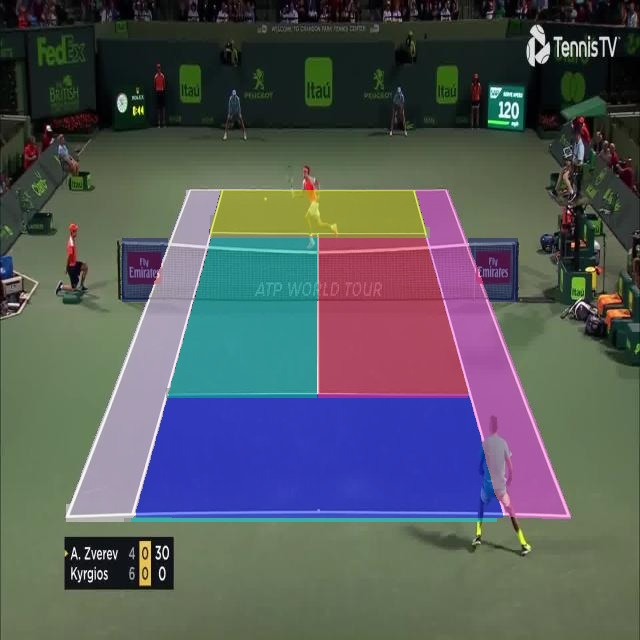

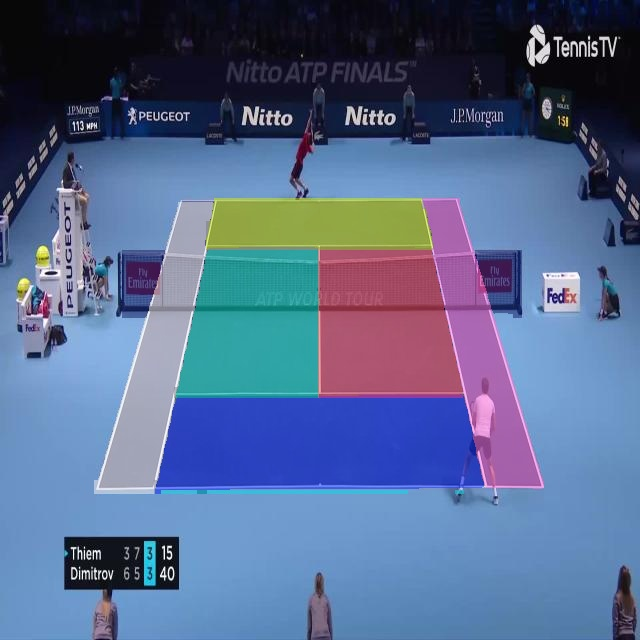

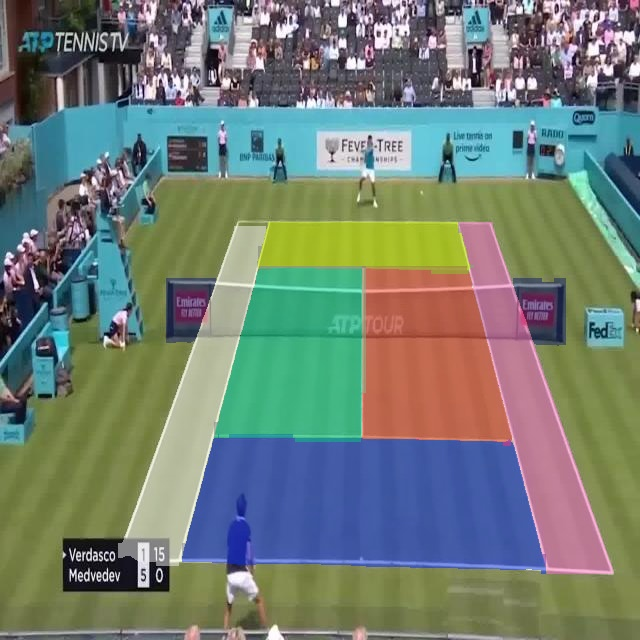

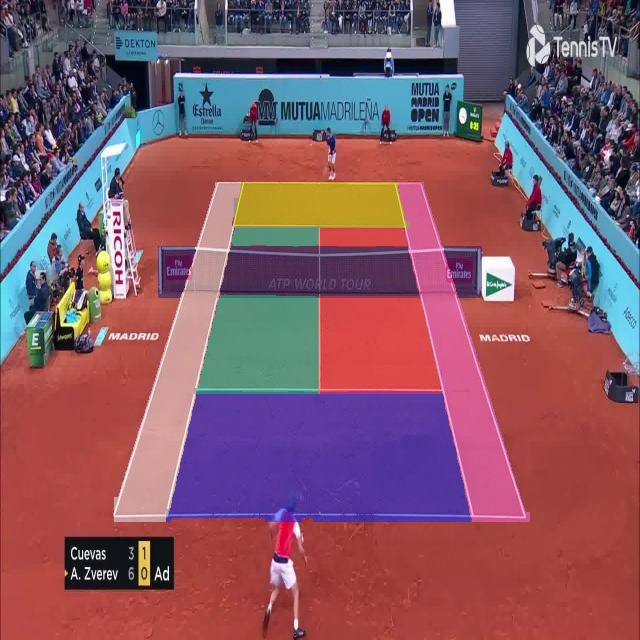

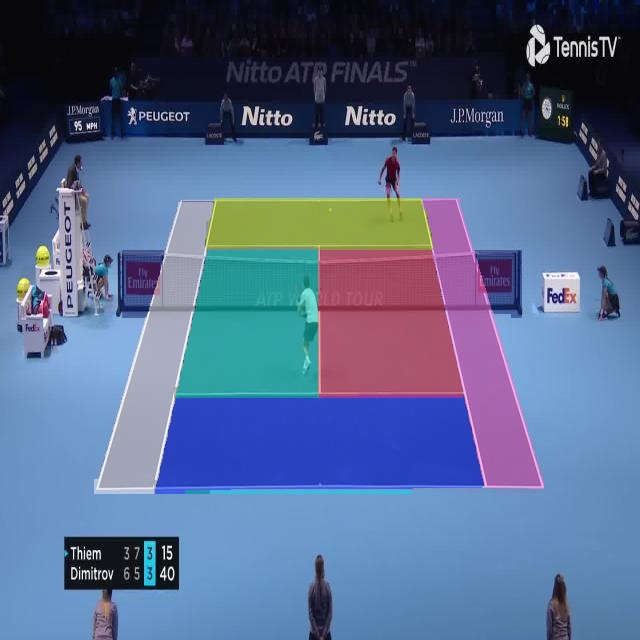

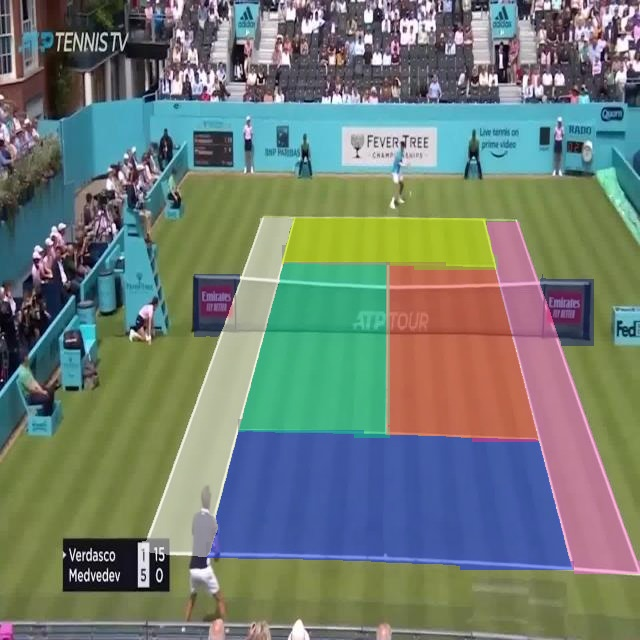

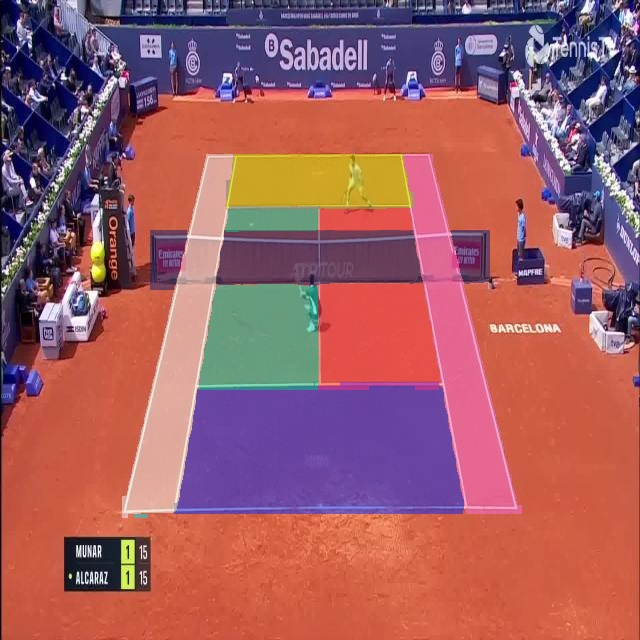

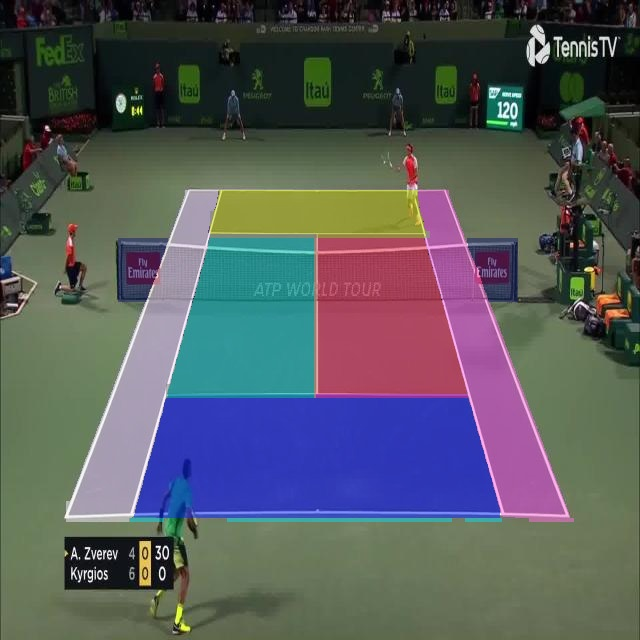

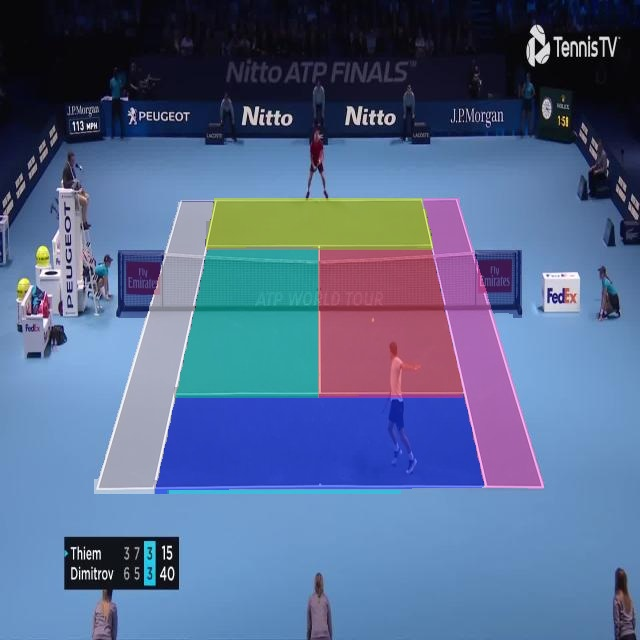

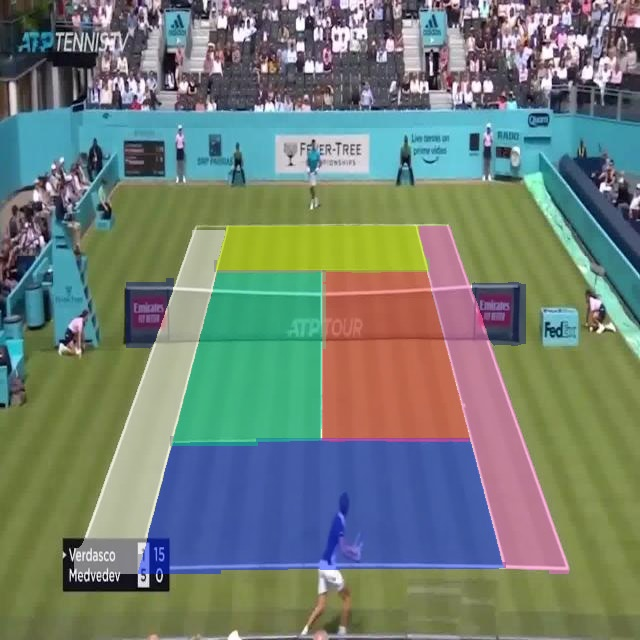

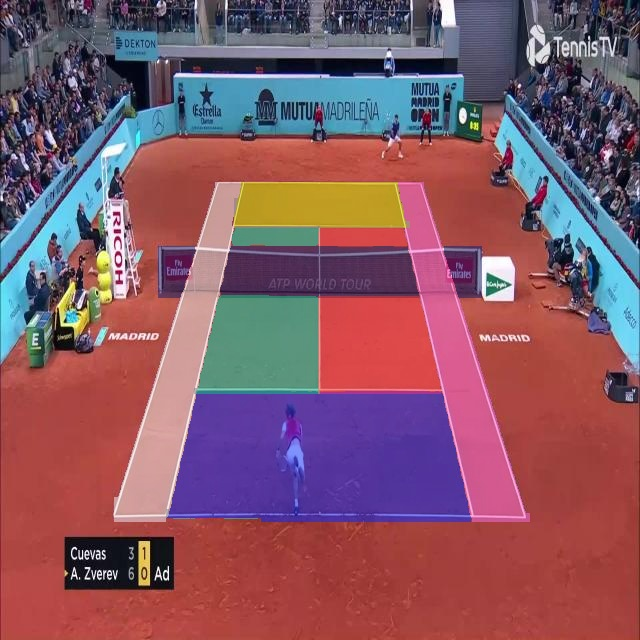

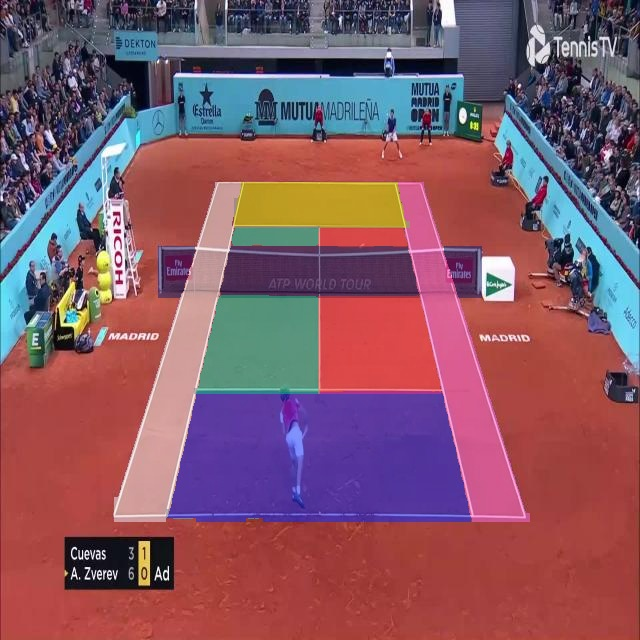

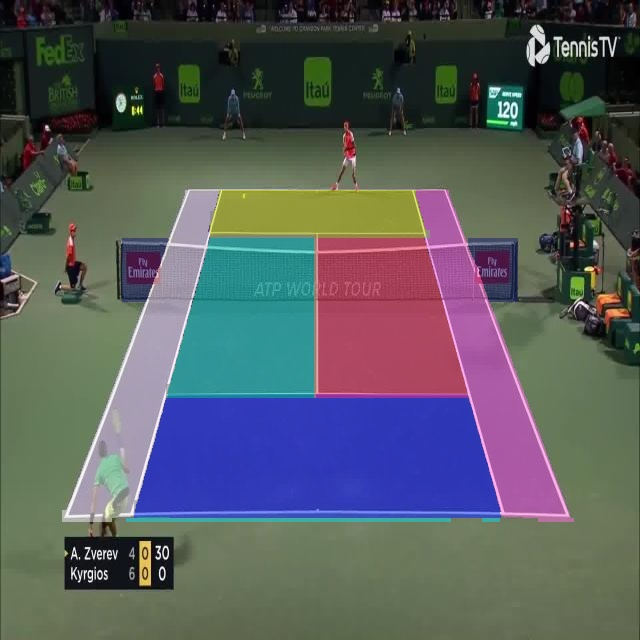

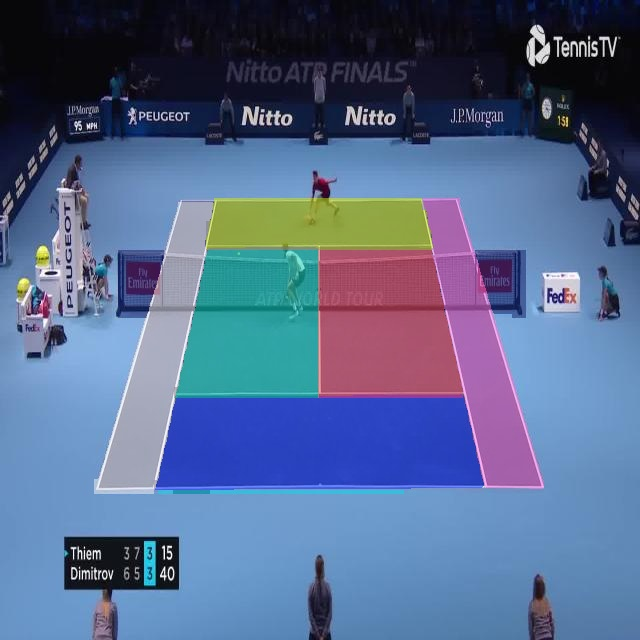

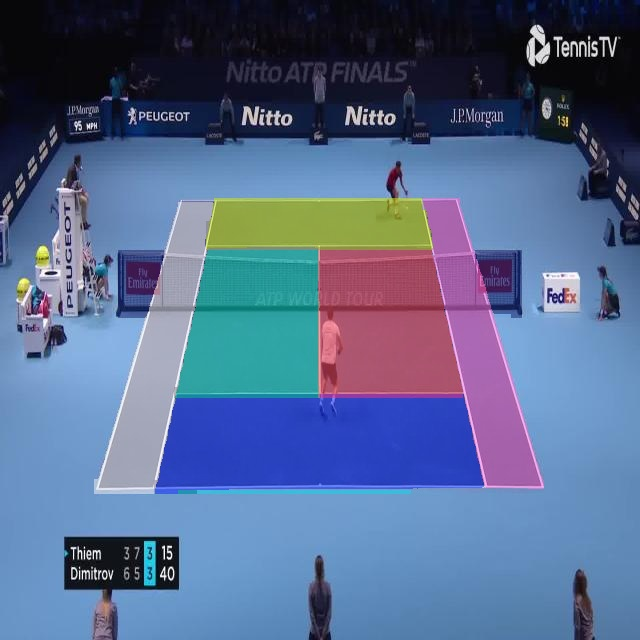

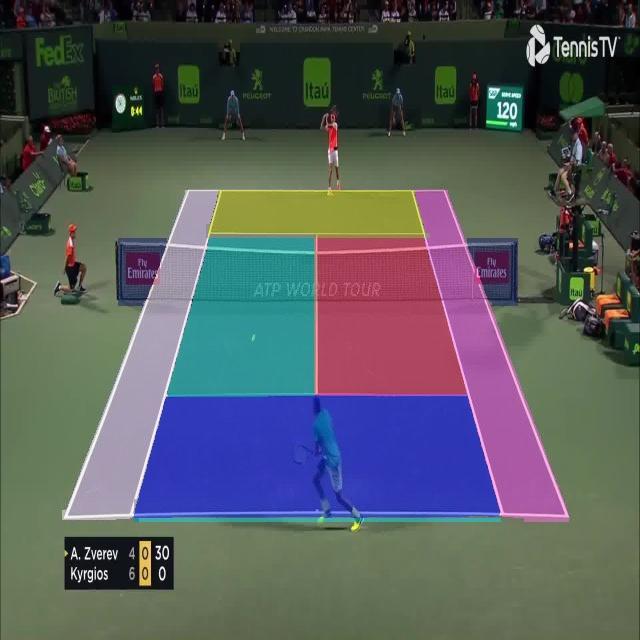

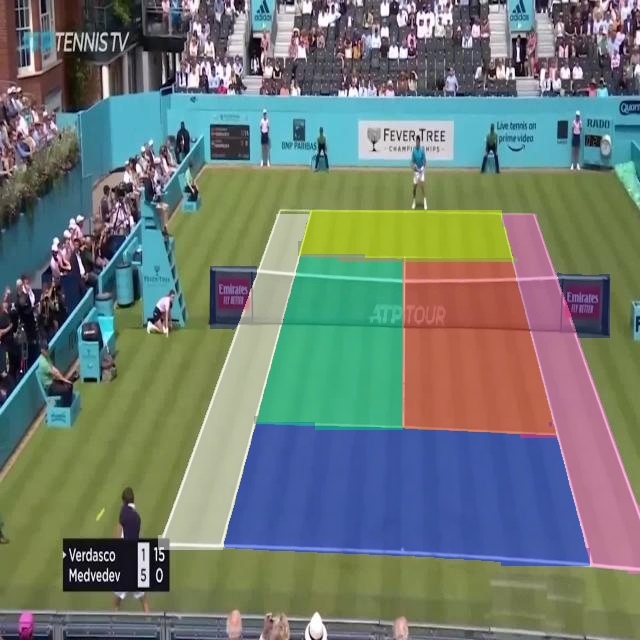

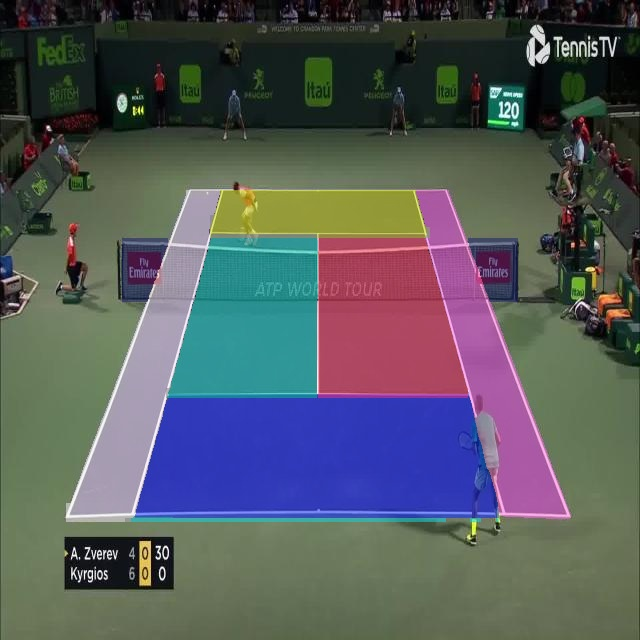

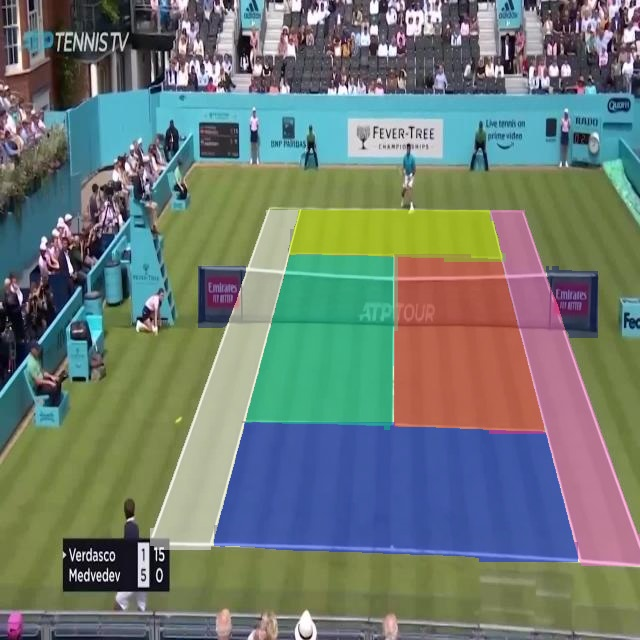

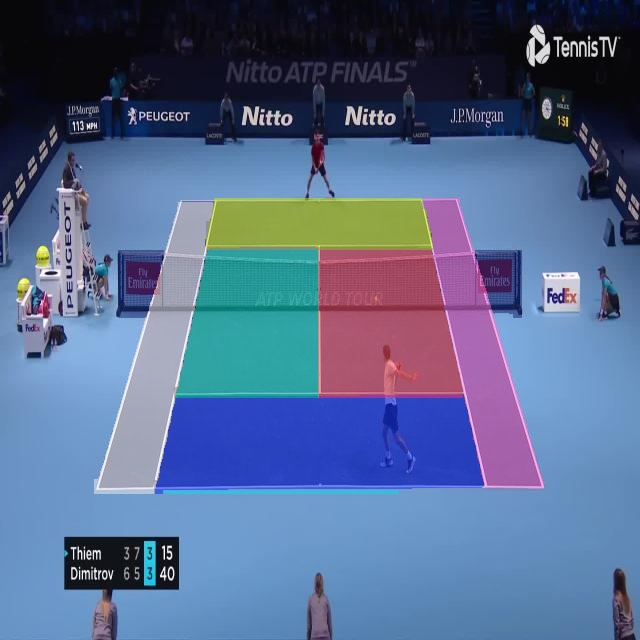

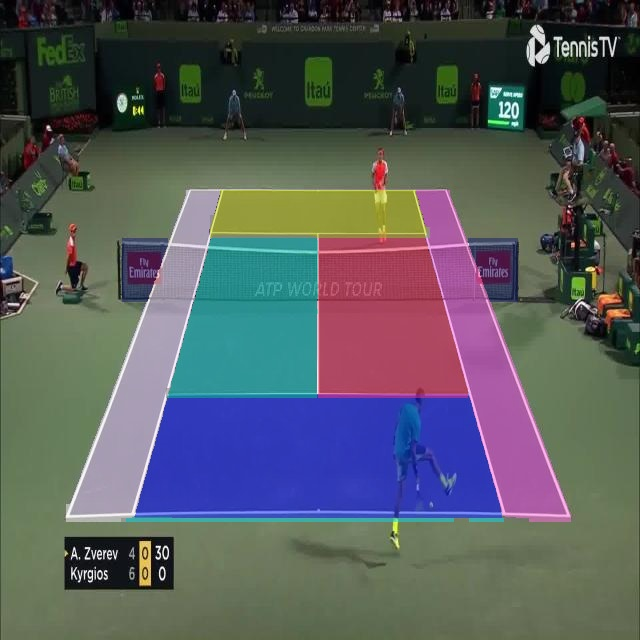

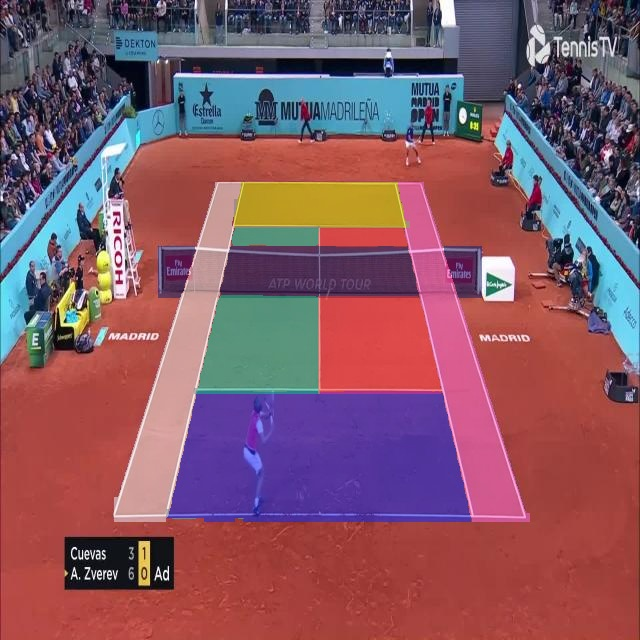

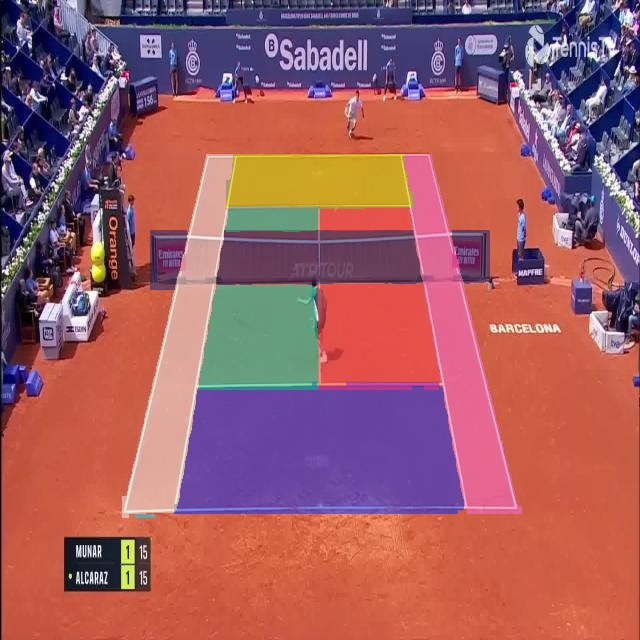

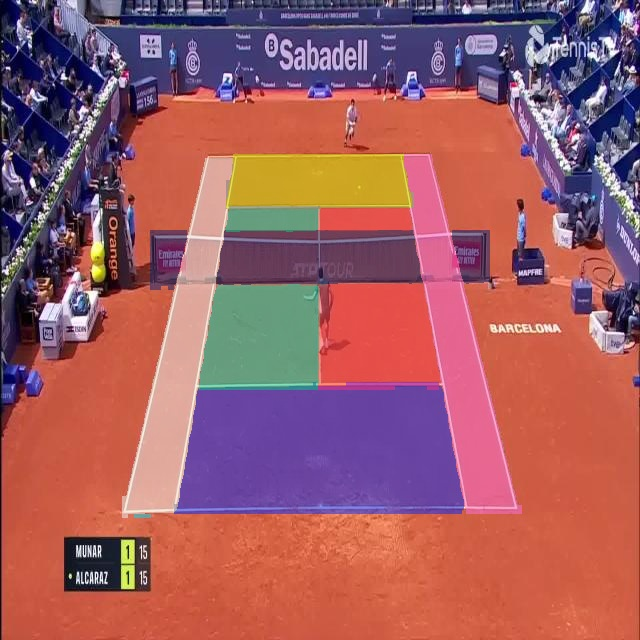

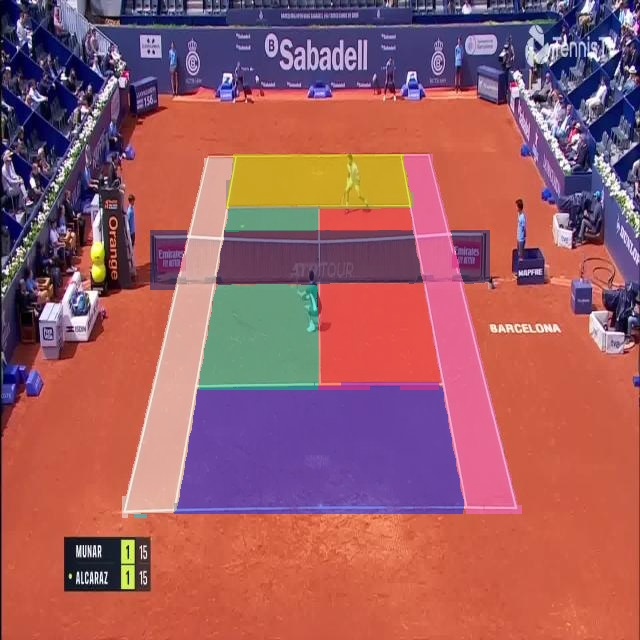

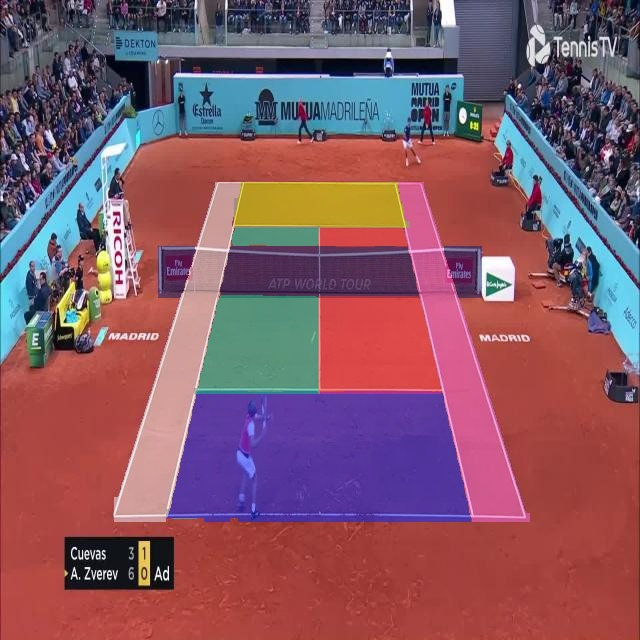

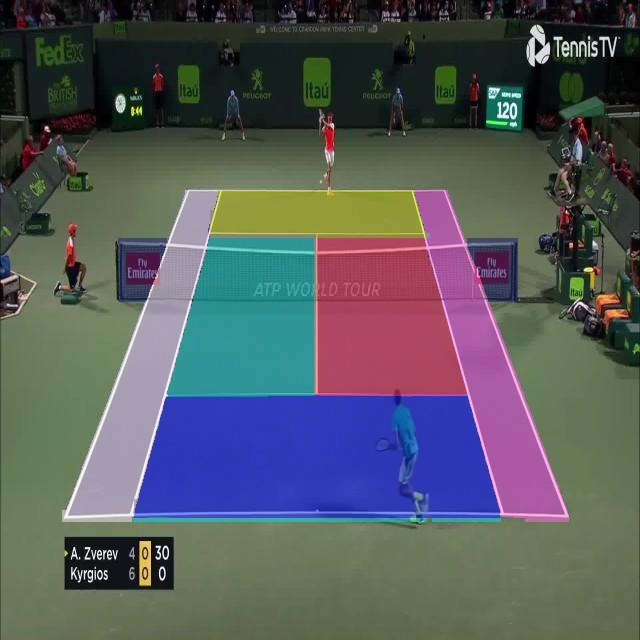

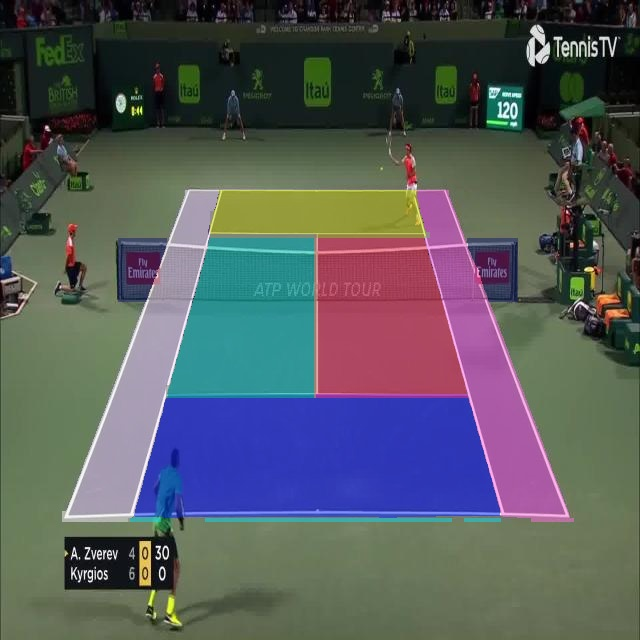

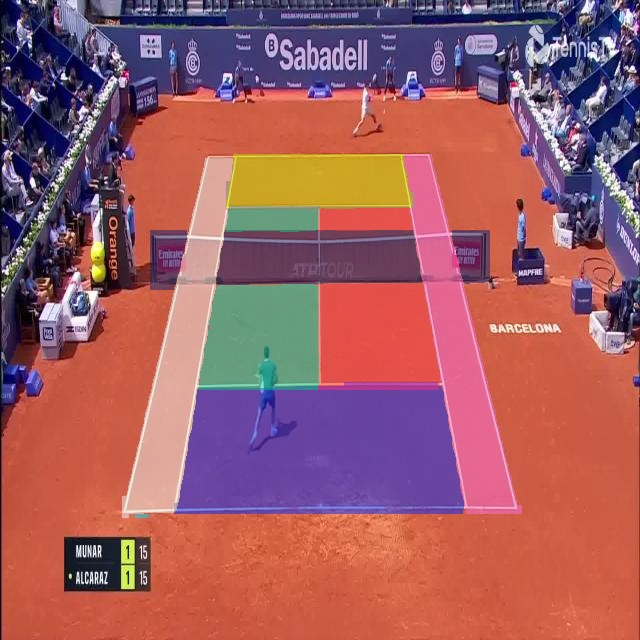

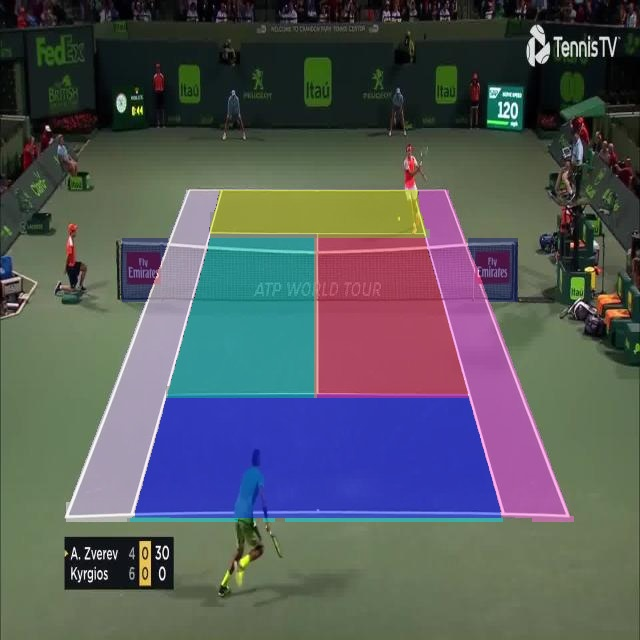

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
    display(Image(filename=image_path, height=600))
    print("\n")